In [1]:
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Stochastic Gradient Descent
class SGDClassifier:
    def __init__(self, loss="log", lr=0.01, max_iter=10000, tol=1e-7, verbose=0):
        self.loss = loss
        self.lr = lr
        self.max_iter = max_iter
        self.verbose = verbose
        self.w = None
        self.bias = 0
        self.losses_ = []
        self.tol = tol

    def _compute_loss(self, X, y):
        pred = X @ self.w + self.bias
        if self.loss == "squared":
            return np.mean((y - pred) ** 2)
        elif self.loss == "log":
            z = pred * (2*y - 1)  # y in {0,1} -> {-1,1}
            return np.mean(np.log(1 + np.exp(-z)))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.random.randn(n_features) * 0.01

        self.bias = 0

        for it in range(1, self.max_iter + 1):
            # Pick a random sample
            i = np.random.randint(0, n_samples)
            xi, yi = X[i], y[i]

            # Prediction
            pred = xi @ self.w + self.bias

            # Gradient
            if self.loss == "squared":
                grad_w = -2 * (yi - pred) * xi
                grad_b = -2 * (yi - pred)
            elif self.loss == "log":
                z = yi * pred  # yi in {0,1} mapped to {-1,1}
                coeff = -yi / (1 + np.exp(z))
                grad_w = coeff * xi
                grad_b = coeff

            # Update weights
            self.w -= self.lr * grad_w
            self.bias -= self.lr * grad_b

            # Record loss occasionally
            #
            if it % 10 == 0:
                l = self._compute_loss(X, y)
                self.losses_.append(l)
                if self.verbose:
                    print(f"iter {it}, loss={l:.6f}")
                if len(self.losses_) > 1 and abs(self.losses_[-1] - self.losses_[-2]) < self.tol:
                    print(f"Converged at {it}")
                    break
        return self

    def predict_proba(self, X):
        pred = X @ self.w + self.bias
        if self.loss == "log":
            p = 1 / (1 + np.exp(-pred))
            return np.stack([1-p, p], axis=1)
        return pred

    def predict(self, X):
        if self.loss == "log":
            return (self.predict_proba(X)[:,1] >= 0.5).astype(int)
        else:
            return (self.predict_proba(X) >= 0.5).astype(int)


In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from ucimlrepo import fetch_ucirepo

# Fetch dataset
bank_marketing = fetch_ucirepo(id=222)
X = bank_marketing.data.features
y = (bank_marketing.data.targets == "yes").astype(int)  # convert yes/no -> 1/0

# One-hot encode categorical features
X = pd.get_dummies(X)

# Scale numeric features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y.values.ravel(), test_size=0.2, random_state=42
)


In [3]:
classifier = SGDClassifier(loss="squared", lr=1e-4, max_iter=5000, verbose=0)
classifier.fit(X_train, y_train)

Converged at 1470


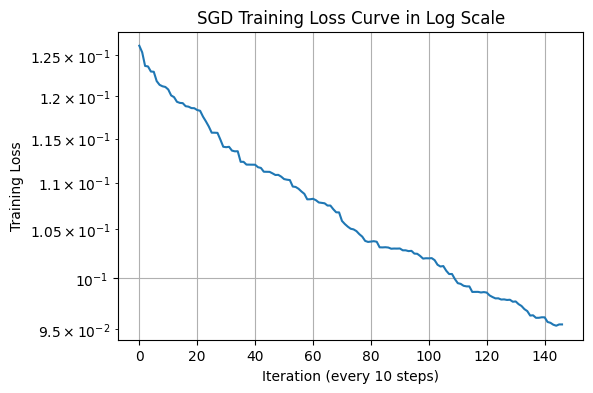

In [4]:
plt.figure(figsize=(6,4))
plt.plot(classifier.losses_)
plt.xlabel("Iteration (every 10 steps)")
plt.ylabel("Training Loss")
plt.title("SGD Training Loss Curve in Log Scale")
plt.yscale('log')
plt.grid(True)
plt.show()

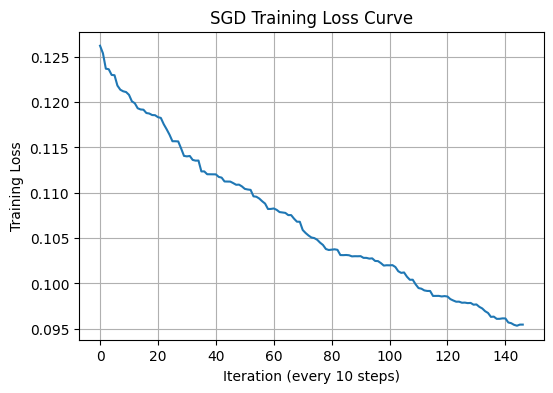

In [5]:
plt.figure(figsize=(6,4))
plt.plot(classifier.losses_)
plt.xlabel("Iteration (every 10 steps)")
plt.ylabel("Training Loss")
plt.title("SGD Training Loss Curve")
#plt.yscale('log')
plt.grid(True)
plt.show()

In [6]:
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.8793541966161672


In [7]:
classifier.losses_

[np.float64(0.1262119262312282),
 np.float64(0.12537798906176745),
 np.float64(0.12368076896306593),
 np.float64(0.12362107773075909),
 np.float64(0.12299405315469622),
 np.float64(0.12295949841326646),
 np.float64(0.12181943684584647),
 np.float64(0.1213629242730387),
 np.float64(0.12118768348103469),
 np.float64(0.12110390329710337),
 np.float64(0.12079843497611616),
 np.float64(0.12008061596678146),
 np.float64(0.11987510673832383),
 np.float64(0.11931811282209634),
 np.float64(0.11918724019391178),
 np.float64(0.11915805824283962),
 np.float64(0.11879405764899093),
 np.float64(0.11873781236090353),
 np.float64(0.11856958018707378),
 np.float64(0.1185524911872472),
 np.float64(0.11833618219108445),
 np.float64(0.11825187557392536),
 np.float64(0.11755869051280389),
 np.float64(0.11700262748663959),
 np.float64(0.11640155665747944),
 np.float64(0.1156832480025564),
 np.float64(0.11568078863514834),
 np.float64(0.11566298694464311),
 np.float64(0.11488795967345197),
 np.float64(0.1140

In [8]:
test_loss = classifier._compute_loss(X_test, y_test)
print("Test Loss:", test_loss)

Test Loss: 0.09923315138702785
